In [ ]:
import re
from matplotlib import pyplot as plt

tau_list = [0.25,0.5,0.75]
r_list = [0.3,0.5,0.9]

def read_log(filepath):
    with open(filepath, 'r') as f:
        lines = f.read()
    return lines

def parse_log(log):
    pattern = r"'mse': ([\d\.]+),"
    mse_str = re.findall(pattern, log)
    mse_list = [float(x) for x in mse_str]
    return mse_list

def plot_mse_trajectory(tau_mse_list, title=''):
    plt.figure(figsize=(10, 6)) 
    for r in r_list:
        mse_list = tau_mse_list[r]
        plt.plot(mse_list, marker='.', linestyle='-', label=f'r={r}')
    plt.legend()
    plt.title(f'MSE Trajectory {title}')
    plt.xlabel('Round')
    plt.ylabel('MSE')
    plt.show()


for tau in tau_list:
    # 每个tau_mse_list是一个子图
    tau_mse_list = {}
    for r in r_list:
        file_path = f'/mnt/fed-ldp-quantile-reg/results/tau_{tau}_r_{r}_em_5.log'
        log = read_log(file_path)
        mse_list = parse_log(log)
        tau_mse_list[r] = mse_list

    plot_mse_trajectory(tau_mse_list, title=f'tau={tau}')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/fed-ldp-quantile-reg/results/tau_0.25_r_0.1_em_5.log'

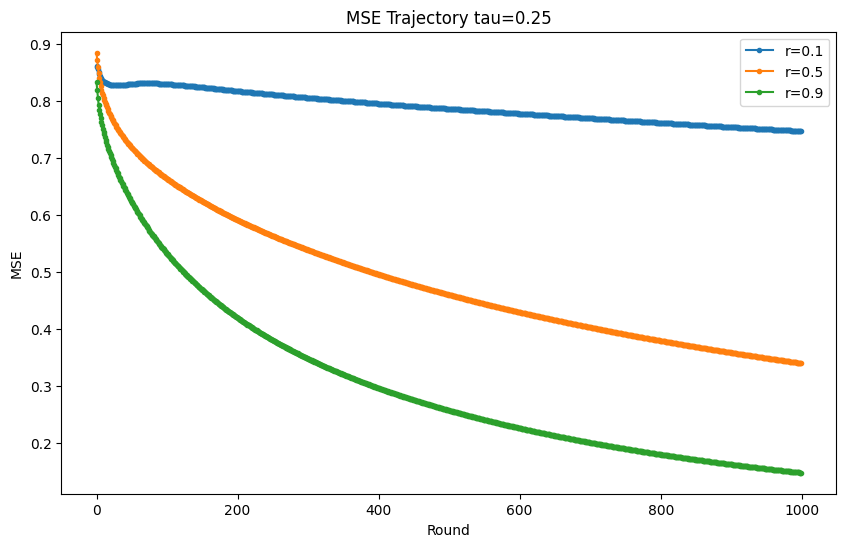

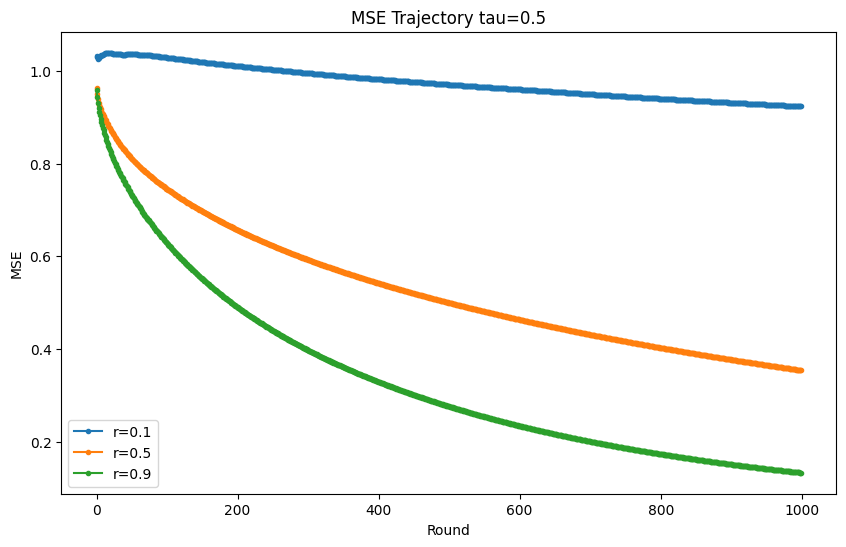

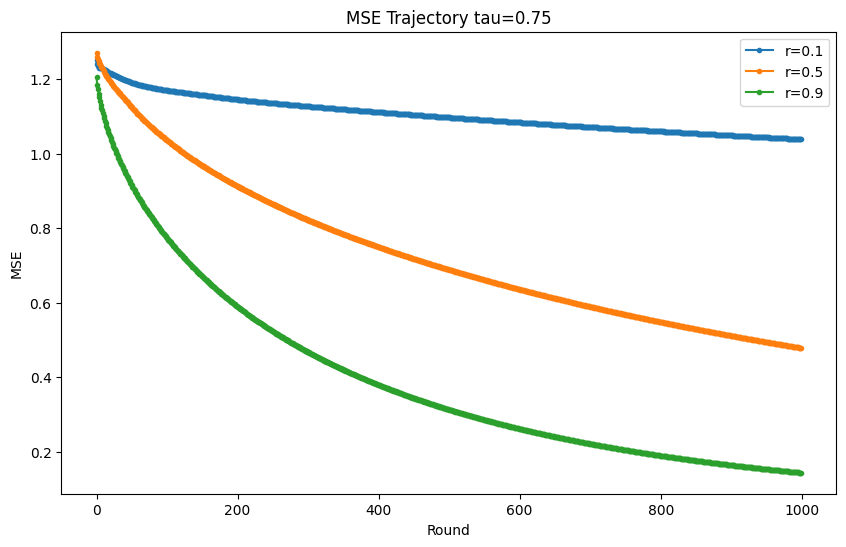

In [14]:
for tau in tau_list:
    tau_mse_list = {}
    for r in r_list:
        file_path = f'/mnt/fed-ldp-quantile-reg/results/tau_{tau}_r_{r}_em_5.log'
        log = read_log(file_path)
        mse_list = parse_log(log)
        tau_mse_list[r] = mse_list

    plot_mse_trajectory(tau_mse_list, title=f'tau={tau}')

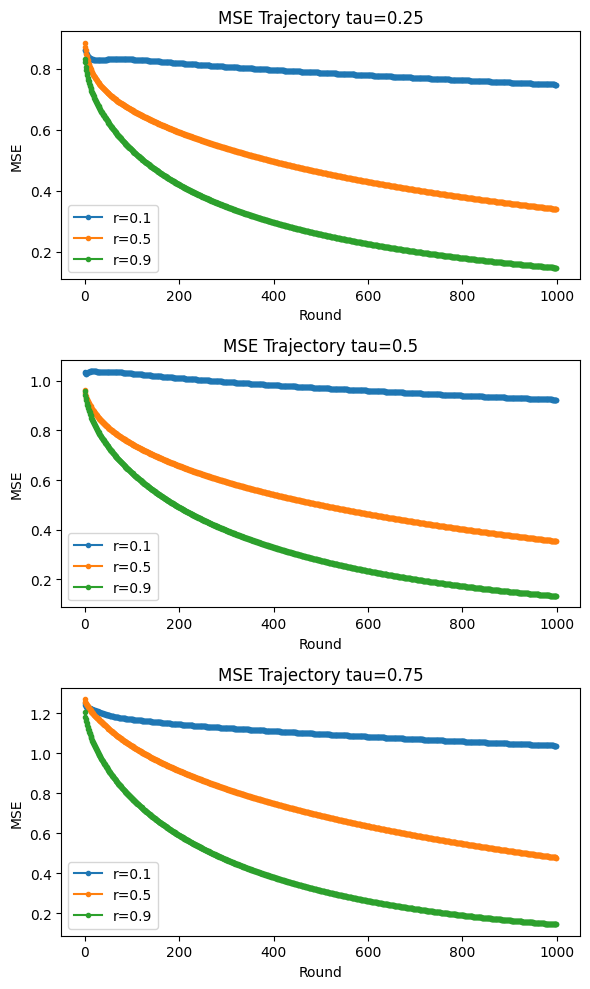

In [9]:
import matplotlib.pyplot as plt

def plot_mse_trajectories_all(tau_mse_dict, tau_list, r_list):
    fig, axes = plt.subplots(3,1, figsize=(6,10))  # 不共享y轴
    for idx, tau in enumerate(tau_list):
        ax = axes[idx]
        tau_mse_list = tau_mse_dict[tau]
        for r in r_list:
            mse_list = tau_mse_list[r]
            ax.plot(mse_list, marker='.', linestyle='-', label=f'r={r}')
        ax.set_title(f'MSE Trajectory tau={tau}')
        ax.set_xlabel('Round')
        ax.set_ylabel('MSE')
        ax.legend()
    plt.tight_layout()
    plt.show()

# 收集所有 tau 的 mse_list
tau_mse_dict = {}
for tau in tau_list:
    tau_mse_list = {}
    for r in r_list:
        file_path = f'/mnt/fed-ldp-quantile-reg/results/results_0912/tau_{tau}_r_{r}_em_5.log'
        log = read_log(file_path)
        mse_list = parse_log(log)
        tau_mse_list[r] = mse_list
    tau_mse_dict[tau] = tau_mse_list

plot_mse_trajectories_all(tau_mse_dict, tau_list, r_list)